# Latent Dimension Analysis of Urban Morphology Indicators
## PCA with Orthogonal Rotation (Cross-Sectional)

This analysis investigates whether urban morphology indicators represent a
smaller number of latent dimensions. We apply Principal Component Analysis (PCA)
to standardized indicators across subdivisions and use orthogonal rotation to
enhance interpretability. PCA is used here as an exploratory tool for identifying
latent structure, not for dimensional reduction.


In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.rotator import Rotator


In [16]:
ABT = gpd.read_file(
    "../../../../Data/Final_dataset/ABT/ABT.gpkg",
    layer="subdivisions"
)

ABT = ABT[(ABT["year"] >= 1990) & (ABT["year"] <= 2023)].copy()


In [18]:
measures = [
    "HAC_dist",
    "BAD",
    "SHD",
    "int_den025",
    "nd_deg025",
    "int_den05",
    "nd_deg05",
    "int_den075",
    "nd_deg075",
    "int_den1",
    "nd_deg1",
]

X = ABT[measures].dropna()
print("PCA input shape (subdivisions × indicators):", X.shape)


PCA input shape (subdivisions × indicators): (5844, 11)


In [19]:
scaler = StandardScaler()
Xz = scaler.fit_transform(X)
Xz = pd.DataFrame(Xz, columns=measures, index=X.index)


In [20]:
pca = PCA()
scores = pca.fit_transform(Xz)

eigenvalues = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_

explained_df = pd.DataFrame({
    "Eigenvalue": eigenvalues,
    "Variance Share": explained_ratio,
    "Cumulative Share": np.cumsum(explained_ratio)
}, index=[f"PC{i+1}" for i in range(len(measures))])

explained_df


,Eigenvalue,Variance Share,Cumulative Share
PC1,6.697,0.609,0.609
PC2,1.087,0.099,0.708
PC3,0.880,0.080,0.788
PC4,0.748,0.068,0.856
PC5,0.574,0.052,0.908
PC6,0.502,0.046,0.953
PC7,0.242,0.022,0.975
PC8,0.134,0.012,0.988
PC9,0.069,0.006,0.994
PC10,0.042,0.004,0.998


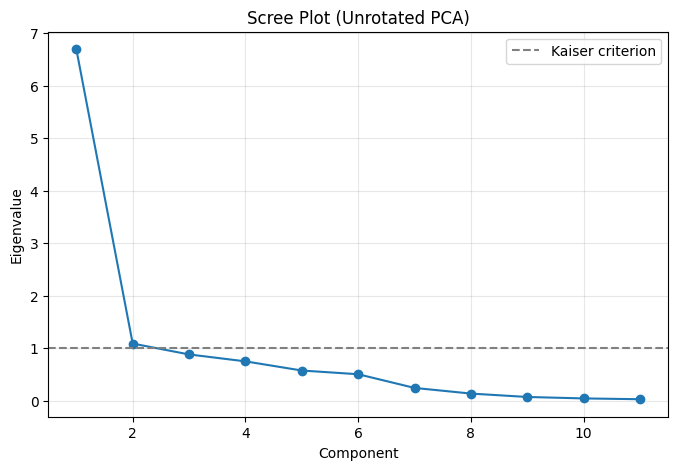

In [21]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(1, linestyle='--', color='gray', label='Kaiser criterion')
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot (Unrotated PCA)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [30]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=measures,
    columns=[f"PC{i+1}" for i in range(len(measures))]
)

print("Unrotated PCA loadings")
loadings


Unrotated PCA loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
HAC_dist,-0.240,-0.010,0.347,0.574,0.502,-0.485,-0.052,-0.047,-0.027,-0.013,-0.011
BAD,0.255,0.008,-0.144,-0.385,0.853,0.190,0.016,0.042,0.024,0.000,0.012
SHD,-0.023,0.806,0.489,-0.317,-0.044,-0.079,0.044,-0.010,-0.005,-0.002,0.001
int_den025,0.315,-0.149,0.373,0.192,-0.002,0.316,0.610,-0.291,-0.349,0.130,0.083
nd_deg025,0.295,0.205,0.093,0.436,0.021,0.527,-0.551,-0.221,0.198,-0.017,-0.040
int_den05,0.347,-0.196,0.324,0.009,-0.062,-0.062,0.213,0.354,0.571,-0.284,-0.390
nd_deg05,0.338,0.240,-0.190,0.291,-0.021,-0.026,0.011,0.668,-0.441,-0.204,0.152
int_den075,0.346,-0.224,0.264,-0.149,-0.081,-0.251,-0.231,0.055,0.185,0.205,0.733
nd_deg075,0.339,0.226,-0.314,0.152,-0.028,-0.281,0.134,-0.030,0.173,0.723,-0.248
int_den1,0.335,-0.226,0.206,-0.247,-0.075,-0.285,-0.421,-0.160,-0.494,-0.023,-0.447


In [23]:
N_ROT = 4  # ~86% cumulative variance


In [31]:
loadings_sub = loadings.iloc[:, :N_ROT]

rotator = Rotator(method="varimax", normalize=True)
rotated = rotator.fit_transform(loadings_sub.values)

rot_loadings = pd.DataFrame(
    rotated,
    index=measures,
    columns=[f"PC{i+1}" for i in range(N_ROT)]
)

print("Rootated PCA loadings")
rot_loadings

Rootated PCA loadings


,PC1,PC2,PC3,PC4
HAC_dist,0.020,0.009,0.059,0.710
BAD,0.105,0.040,-0.064,-0.466
SHD,-0.019,0.994,0.018,-0.034
int_den025,0.492,0.012,-0.067,0.225
nd_deg025,0.155,0.088,-0.435,0.327
int_den05,0.512,0.001,-0.009,0.037
nd_deg05,0.007,0.012,-0.537,0.069
int_den075,0.494,-0.008,0.047,-0.122
nd_deg075,-0.054,-0.023,-0.523,-0.103
int_den1,0.457,-0.012,0.074,-0.228


In [32]:
communalities = (rot_loadings ** 2).sum(axis=1)
communalities_df = pd.DataFrame({
    "Communality": communalities
}).sort_values("Communality", ascending=False)

communalities_df

,Communality
SHD,0.990
HAC_dist,0.507
nd_deg025,0.328
int_den025,0.298
nd_deg05,0.293
nd_deg075,0.287
nd_deg1,0.272
int_den1,0.266
int_den05,0.263
int_den075,0.261


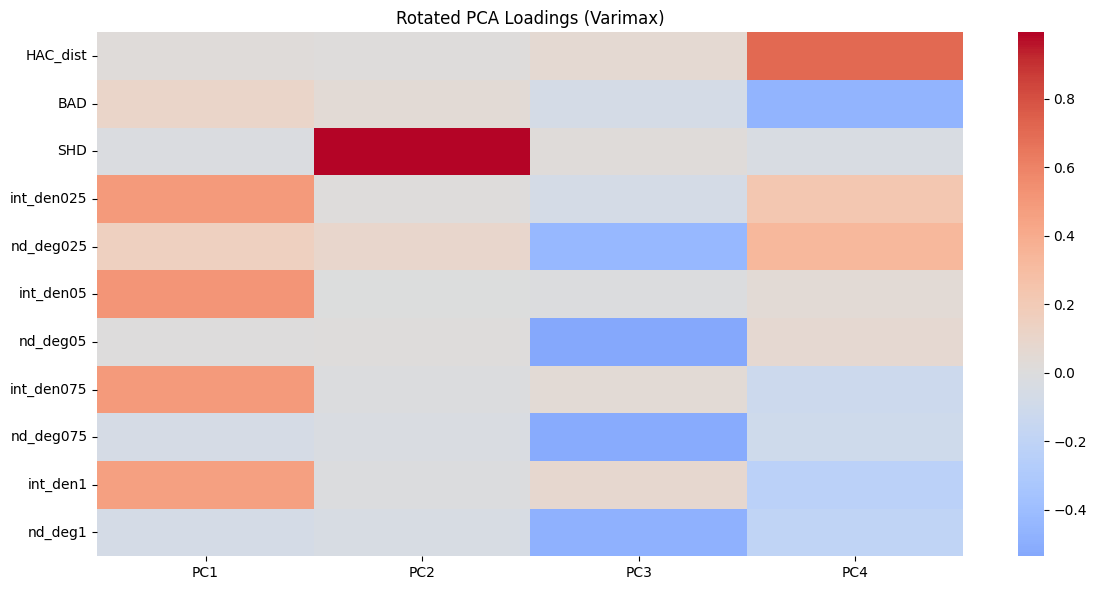

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(rot_loadings, cmap="coolwarm", center=0, annot=False)
plt.title("Rotated PCA Loadings (Varimax)")
plt.tight_layout()
plt.show()

In [34]:
!jupyter nbconvert --to html --no-input PCA.ipynb --output ../../../../output/Notebook_Outputs/time_series/PCA.html

[NbConvertApp] Converting notebook PCA.ipynb to html
[NbConvertApp] Writing 655770 bytes to ..\..\..\..\output\Notebook_Outputs\time_series\PCA.html
